# Analysis of Cancer Gene Expression Data

##### Python main module imports for data analysis

In [1]:
# required modules
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_auc_score, confusion_matrix

### Data Engineering
##### Choose the data set:

In [2]:
# read data file
datafile = '~/Documents/THESIS/breast_cancer_analysis/ICOS_DATA/breast_preprocessed.txt'
data = pd.read_table(datafile, delim_whitespace = True, 
                     dtype={'a': np.float64}, header = None)

/home/jcapitz/anaconda/lib/python2.7/site-packages/pandas/io/parsers.py:1170: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


In [3]:
# data dimension
print data.shape
# last 5 rows of the data
data.tail()

(47294, 129)


,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,128
47289,lysA,5.68,5.7194,5.7592,5.6898,5.7236,5.662,5.6684,5.6742,5.6669,...,5.7164,5.7175,5.7133,5.7133,5.6753,5.6679,5.6692,5.7666,5.72,5.75
47290,pheA,5.705,5.6142,5.6955,5.6227,5.6727,5.5995,5.633,5.6539,5.6511,...,5.6595,5.6292,5.6042,5.6266,5.6022,5.6709,5.6136,5.6038,5.6693,5.5818
47291,thrB,5.7077,5.7586,5.7279,5.6777,5.6761,5.7091,5.6777,5.68,5.6763,...,5.6918,5.6501,5.5772,5.6637,5.6556,5.6587,5.6987,5.6933,5.6775,5.68
47292,trpF,5.6684,5.6585,5.6337,5.6427,5.6371,5.6691,5.62,5.6199,5.6608,...,5.6392,5.6451,5.6149,5.551,5.605,5.6246,5.5404,5.6206,5.6552,5.6141
47293,y,luminal,luminal,luminal,luminal,luminal,non-luminal,non-luminal,luminal,luminal,...,luminal,luminal,luminal,non-luminal,non-luminal,luminal,luminal,luminal,non-luminal,luminal


In [4]:
import thefunc as fu

In [5]:
# extract colum names (all but last one are gene names).
colNames = list(data[0])

In [6]:
# check for housekeepnig genes
fu.housekeepgenes('HK_exons.csv',data)

there are 0 house keeping genes.


In [7]:
X,Y = fu.data_engineer(data,colNames)

In [8]:
#Percent of cancer positive
np.mean(Y)

0.65625

## Classification with Penalized Logistic Model

In [9]:
cv_results = pd.read_csv('cv_results.csv')
print cv_results.iloc[0,2]
print cv_results.iloc[0,3]
cv_results.head(10)

0.233952406474
0.45


,Unnamed: 0,accuracy,alpha,l1_ratio
0,2448,0.890476,0.233952,0.45
1,2319,0.890476,0.088371,1.00
2,2490,0.883333,0.308982,0.55
3,2394,0.882143,0.154141,0.75
4,2454,0.873810,0.233952,0.75
5,1977,0.869048,0.008307,0.90
6,2512,0.867857,0.355088,0.65
7,2276,0.866667,0.066912,0.85
8,1988,0.866667,0.009547,0.45
9,2124,0.865476,0.025275,0.25


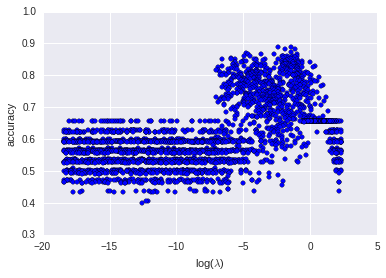

In [10]:
plt.scatter(np.log(cv_results['alpha']),cv_results['accuracy'])
plt.xlabel('log($\lambda$)')
plt.ylabel('accuracy')
plt.savefig('/home/jcapitz/Documents/THESIS/summary/cv_penalty_plot')
plt.show()

In [11]:
# l1_ratio refers to alpha and alpha refers to lamba in Hastie
penalty = cv_results.iloc[0,2]
mix = cv_results.iloc[0,3]

log_model = SGDClassifier(loss = 'log', penalty = 'elasticnet', alpha = penalty, l1_ratio = mix, 
                          fit_intercept = True)

### Significant Gene Selection

In [12]:
results = pd.read_csv('results.csv')
feature_select_summary = pd.read_csv('feature_select_summary.csv')

In [13]:
results[['Feature', 'Frequency', 'Coefficient', 'Std Error', 'pvalue']].head(10)


,Feature,Frequency,Coefficient,Std Error,pvalue
0,GI_4503602-S,500,1.804538,0.457641,0.000040
1,GI_21614543-S,499,-1.187205,0.387229,0.001085
2,GI_9951924-S,498,0.851817,0.360129,0.009007
3,GI_29738585-S,498,0.747732,0.297951,0.006044
4,GI_38455428-S,497,1.079030,0.427434,0.005794
5,GI_4503928-S,494,0.793145,0.377238,0.017754
6,GI_31341936-S,489,0.680840,0.345094,0.024253
7,GI_42659459-S,483,0.611876,0.350472,0.040417
8,GI_31542212-S,481,-0.605973,0.339184,0.037004
9,GI_4504700-S,476,-0.538345,0.284800,0.029362


In [14]:
results.tail()

,Unnamed: 0,Feature,Frequency,Score,Coefficient,Std Error,pvalue
1012,613,GI_12597652-S,1,1.979784e-06,-1.979784e-06,4.426931e-05,0.482165
1013,1221,GI_13540544-S,1,1.594931e-06,-1.594931e-06,3.566374e-05,0.482165
1014,24398,GI_6382077-S,1,1.274498e-06,-1.274498e-06,2.849863e-05,0.482165
1015,344,GI_11342663-S,1,8.899318e-07,-8.899318e-07,1.989948e-05,0.482165
1016,21672,GI_42794611-S,1,4.949028e-09,-4.949028e-09,1.106636e-07,0.482165


In [15]:
X.shape

(128, 47293)

In [16]:
GI_4503602_S = X['GI_4503602-S']
GI_38455428_S = X['GI_38455428-S']
GI_21614543_S = X['GI_21614543-S']
GI_29738585_S = X['GI_29738585-S']

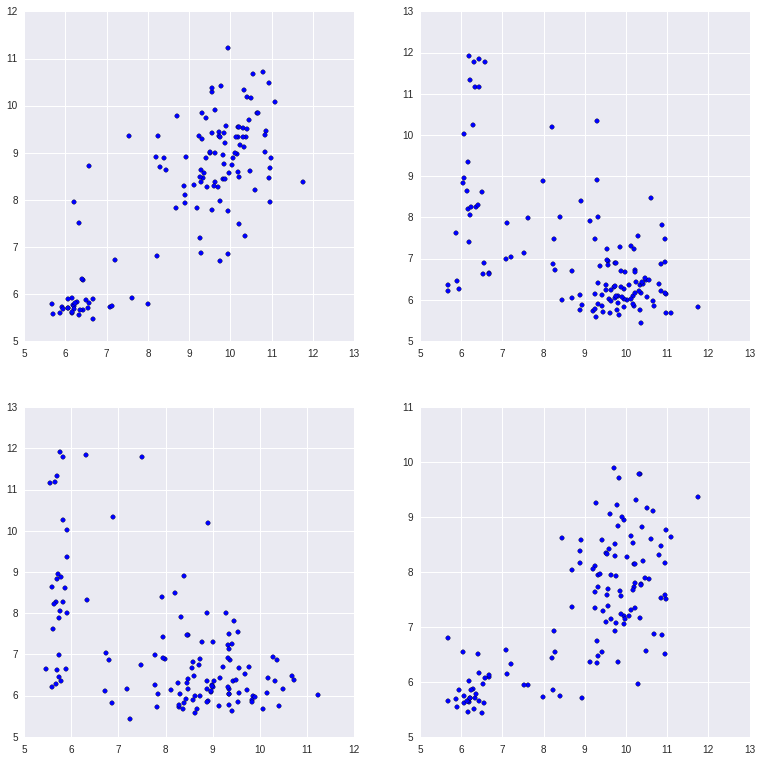

In [17]:
plt.figure(figsize=(13,13))
plt.subplot(2,2,1)
plt.scatter(GI_4503602_S,GI_38455428_S)
plt.subplot(2,2,2)
plt.scatter(GI_4503602_S,GI_21614543_S)
plt.subplot(2,2,3)
plt.scatter(GI_38455428_S,GI_21614543_S)
plt.subplot(2,2,4)
plt.scatter(GI_4503602_S,GI_29738585_S)
plt.show()

In [18]:
print len(results['Feature'])
results[['Feature', 'Frequency', 'Coefficient', 'Std Error', 'pvalue']].head(4)

1017


,Feature,Frequency,Coefficient,Std Error,pvalue
0,GI_4503602-S,500,1.804538,0.457641,0.000040
1,GI_21614543-S,499,-1.187205,0.387229,0.001085
2,GI_9951924-S,498,0.851817,0.360129,0.009007
3,GI_29738585-S,498,0.747732,0.297951,0.006044


In [19]:
#Need to create X_sel

#X_sel.to_csv('X_sel.csv')

X_sel = pd.read_csv('X_sel.csv')

X_sel.head()

,Unnamed: 0,GI_4503602-S,GI_21614543-S,GI_9951924-S,GI_29738585-S,GI_38455428-S,GI_4503928-S,GI_31341936-S,GI_42659459-S,GI_31542212-S,...,GI_42794770-A,GI_29826284-A,GI_26051241-S,GI_18641378-S,GI_40548398-A,GI_12597652-S,GI_13540544-S,GI_6382077-S,GI_11342663-S,GI_42794611-S
0,0,9.7077,6.3119,10.0794,9.8838,8.2690,11.0795,9.3544,7.4915,5.7431,...,8.4268,7.8296,6.5488,9.2080,6.0758,6.3409,5.8695,7.8671,6.9095,5.7158
1,1,9.3272,6.4005,9.3713,6.4782,8.4707,10.3874,8.2741,9.3582,5.7139,...,8.7200,8.0528,6.7308,9.5728,5.9406,6.4650,5.8568,8.5798,6.3987,6.1526
2,2,9.7234,6.3478,10.1479,8.2889,9.4392,10.3963,8.8317,7.9232,5.9560,...,8.8739,8.0343,6.8574,10.2316,5.7467,6.4350,5.9248,8.2085,6.6324,5.6108
3,3,10.9760,6.1547,9.9660,7.4989,8.8842,10.7271,7.2614,9.1787,5.8513,...,8.1855,7.8209,6.4889,8.9390,8.1399,6.5069,5.6950,7.8776,6.2255,5.6677
4,4,10.6502,5.9851,9.8026,9.1028,9.8455,10.7180,9.1615,9.3466,6.9940,...,8.2197,7.2397,6.5733,9.4455,7.0968,6.6071,6.0528,7.9420,6.4794,5.7066


In [20]:
X_sel.drop('Unnamed: 0', inplace=True, axis = 1)

In [21]:
X_sel.head()

,GI_4503602-S,GI_21614543-S,GI_9951924-S,GI_29738585-S,GI_38455428-S,GI_4503928-S,GI_31341936-S,GI_42659459-S,GI_31542212-S,GI_4504700-S,...,GI_42794770-A,GI_29826284-A,GI_26051241-S,GI_18641378-S,GI_40548398-A,GI_12597652-S,GI_13540544-S,GI_6382077-S,GI_11342663-S,GI_42794611-S
0,9.7077,6.3119,10.0794,9.8838,8.2690,11.0795,9.3544,7.4915,5.7431,7.3131,...,8.4268,7.8296,6.5488,9.2080,6.0758,6.3409,5.8695,7.8671,6.9095,5.7158
1,9.3272,6.4005,9.3713,6.4782,8.4707,10.3874,8.2741,9.3582,5.7139,6.7365,...,8.7200,8.0528,6.7308,9.5728,5.9406,6.4650,5.8568,8.5798,6.3987,6.1526
2,9.7234,6.3478,10.1479,8.2889,9.4392,10.3963,8.8317,7.9232,5.9560,6.8923,...,8.8739,8.0343,6.8574,10.2316,5.7467,6.4350,5.9248,8.2085,6.6324,5.6108
3,10.9760,6.1547,9.9660,7.4989,8.8842,10.7271,7.2614,9.1787,5.8513,5.8440,...,8.1855,7.8209,6.4889,8.9390,8.1399,6.5069,5.6950,7.8776,6.2255,5.6677
4,10.6502,5.9851,9.8026,9.1028,9.8455,10.7180,9.1615,9.3466,6.9940,6.7790,...,8.2197,7.2397,6.5733,9.4455,7.0968,6.6071,6.0528,7.9420,6.4794,5.7066


In [22]:
# this gives the model's score
log_model.fit(X_sel,Y)
print log_model.score(X_sel,Y)

0.34375


In [23]:
class_prob = log_model.predict_proba(X_sel)

In [24]:
dfprob = DataFrame(class_prob)
print dfprob.mean()

0    0.999232
1    0.000768
dtype: float64


### Mean Accuracy in Class Prediction

In [25]:
X_sel.shape

(128, 1017)

In [26]:
model2 = LogisticRegression(dual = False, fit_intercept = True)
mean_acc, std_acc, mean_roc, std_roc = fu.accuracy_calculator(model2,X_sel,Y,1000)
print mean_acc
print mean_roc

0.8726875
0.84428718938


In [27]:
np.corrcoef(X_sel)

array([[ 1.        ,  0.79332851,  0.76840152, ...,  0.65961038,
         0.5600692 ,  0.68565582],
       [ 0.79332851,  1.        ,  0.8387731 , ...,  0.60932832,
         0.60728135,  0.77658021],
       [ 0.76840152,  0.8387731 ,  1.        , ...,  0.60360561,
         0.62168885,  0.82345304],
       ..., 
       [ 0.65961038,  0.60932832,  0.60360561, ...,  1.        ,
         0.71174855,  0.64261901],
       [ 0.5600692 ,  0.60728135,  0.62168885, ...,  0.71174855,
         1.        ,  0.57152672],
       [ 0.68565582,  0.77658021,  0.82345304, ...,  0.64261901,
         0.57152672,  1.        ]])

In [28]:
X_sel.iloc[:,:20].shape

(128, 20)

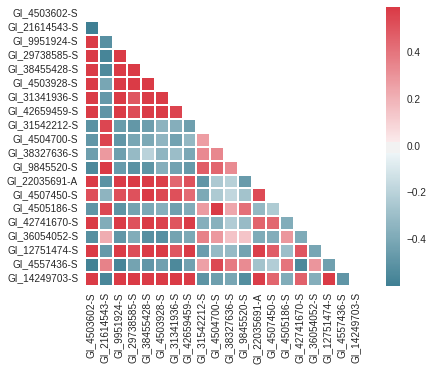

In [29]:
sns.set(style="white")


# Compute the correlation matrix
corr = X_sel.iloc[:,:20].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8,5))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, square=True)#, linewidths=.5)

#plt.savefig('/home/jcapitz/Documents/THESIS/summary/corr_matrix')

plt.show()


## Loss Function Gradient

In [30]:
w = np.array(results['Coefficient'])#.reshape((1017,1))
print type(w)
w.shape

<type 'numpy.ndarray'>


(1017,)

In [31]:
def logloss_gradient(w,X,y):
    """
    Calculates gradient of the logistic loss;
    arguments:
        w: px1 vector of estimated feature coefficients
        X: nxp data matrix, with n samples and p features
        y: nx1 response vector
    returns:
        g: the px1 gradient vector
    """
    n = X.shape[0]
    z = np.dot(X,w)
    p = 1/(1 + np.exp(-z))
    g = np.dot((p - y),X)/n
    return g

In [32]:
print w.shape
print X_sel.shape
print Y.shape
Y = Y.reshape((128,))

(1017,)
(128, 1017)
(128,)


In [33]:
logloss_gradient(w,X_sel,Y).shape

(1017,)

In [34]:
Y = Y.reshape((128,))

In [35]:
z = np.dot(X_sel,w)
z.shape

(128,)

# Network Inference

In [36]:
W = np.genfromtxt('adj_mat.csv',delimiter = ',')

In [37]:
W.shape

(1017, 1017)

In [38]:
W[0][2]

0.034610524183097652

In [39]:
W[2][0]

0.059148186343896646

In [40]:
W.trace()

0.0

In [41]:
import networkx as nx
#G = nx.from_scipy_sparse_matrix(W)
G = nx.from_numpy_matrix(W)

node_labels = X_sel.columns
mapping = dict(zip(G.nodes(), node_labels))
G = nx.relabel_nodes(G,mapping, copy=False)

In [42]:
print nx.is_connected(G)
print nx.number_connected_components(G)
#print nx.pagerank(G)

True
1


In [43]:
nx.number_of_nodes(G)

1017

In [44]:
gene_degree = DataFrame(G.degree().items(), columns = ['Gene','Degree'])
gene_degree.sort('Degree', ascending=False, inplace=True)

In [45]:
gene_centrality = DataFrame(nx.degree_centrality(G).items(), columns=['Gene','Centrality'])
gene_centrality.sort('Centrality', ascending=False, inplace=True)

In [46]:
gene_closeness = DataFrame(nx.closeness_centrality(G).items(), columns=['Gene','Closeness'])
gene_closeness.sort('Closeness', ascending=False, inplace=True)

In [47]:
gene_pagerank = DataFrame(nx.pagerank(G).items(), columns=['Gene', 'PageRank'])
gene_pagerank.sort('PageRank', ascending=False, inplace=True)

In [48]:
gene_graph_measures = pd.merge(pd.merge(gene_degree,gene_centrality, on = 'Gene'),
        pd.merge(gene_closeness,gene_pagerank, on = 'Gene'), on = 'Gene')

In [49]:
len(G['GI_4503602-S'])

356

In [50]:
gene_graph_measures.sort('PageRank', ascending=False).head()

,Gene,Degree,Centrality,Closeness,PageRank
0,GI_4505042-S,569,0.560039,0.694463,0.003325
1,GI_17158004-S,567,0.558071,0.693515,0.003140
2,GI_4505820-S,499,0.491142,0.662753,0.003107
7,GI_4826835-S,435,0.428150,0.636193,0.002970
14,GI_27734956-S,412,0.405512,0.627160,0.002943


In [51]:
H = G.subgraph(G.neighbors('GI_4505042-S'))
print len(H.nodes())
print H.size()
print nx.number_of_edges(H)

569
30850
30850


In [52]:
I = G.subgraph(G.neighbors('GI_4503602-S'))
print len(I.nodes())
print I.size()
print nx.number_of_edges(I)

356
12694
12694


In [53]:
J = G.subgraph(G.neighbors('GI_17158004-S'))
print nx.number_of_edges(J)
print nx.number_of_nodes(J)

31119
567


In [54]:
K = G.subgraph(G.neighbors('GI_4505820-S'))
print nx.number_of_edges(K)
print nx.number_of_nodes(K)

26394
499


### Interesting Graphs

In [55]:
#nx.draw_networkx_nodes?

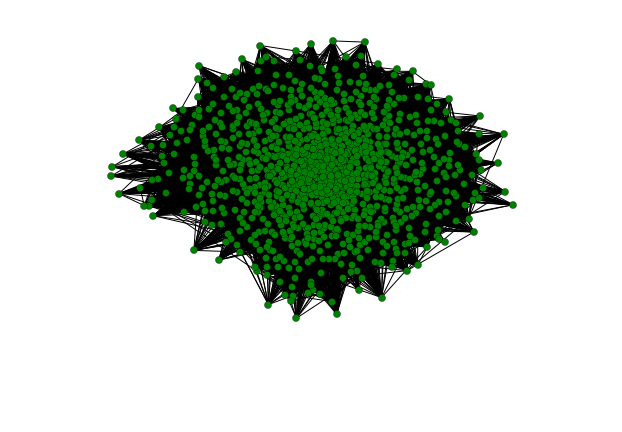

In [56]:
#plt.figure(figsize=(14,7))
#plt.subplot(1,2,1)
nx.draw(G, node_size = 50, node_color = 'g')
#nx.draw_networkx_nodes('GI_4505042-S',pos,nodelist=[largest_hub],node_size=300,node_color='r')
#plt.title('Influential Genes Breast Cancer Network')
#plt.title('(a) Compplete Graph')
plt.savefig('/home/jcapitz/Documents/THESIS/summary/influential_genes_ntwk')
plt.show()

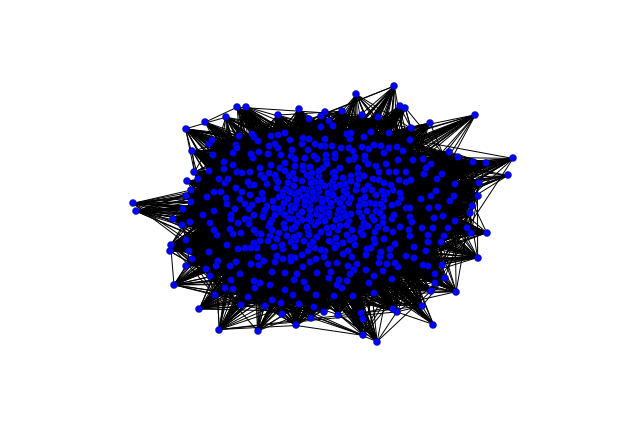

In [57]:
#plt.subplot(1,2,2)
nx.draw(H, node_size = 50, node_color='b')
#plt.title('Lactoferring Gene Network')
#plt.title('(b) Lactoferring Graph')
plt.savefig('/home/jcapitz/Documents/THESIS/summary/lactoferring_genes_ntwk')
plt.show()

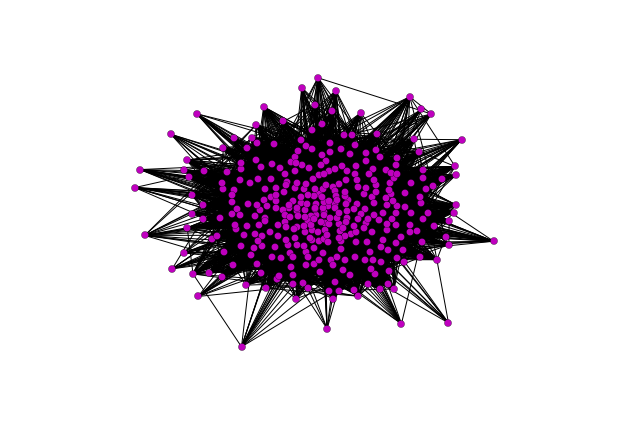

In [58]:
nx.draw(I, node_size = 50, node_color='m')
plt.savefig('/home/jcapitz/Documents/THESIS/summary/estrogen_genes_ntwk')
plt.show()

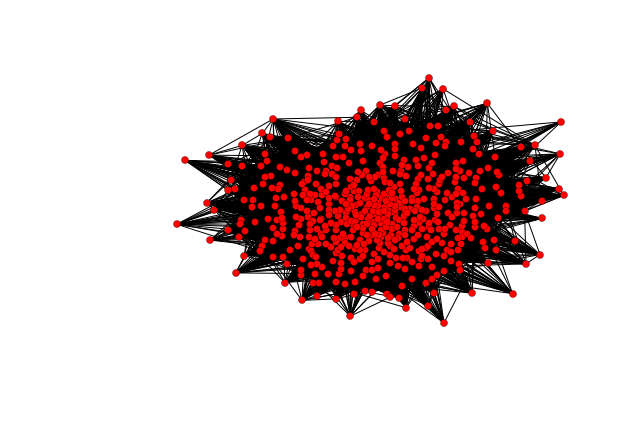

In [59]:
nx.draw(J, node_size = 50, node_color='r')
plt.savefig('/home/jcapitz/Documents/THESIS/summary/epithelial_genes_ntwk')
plt.show()

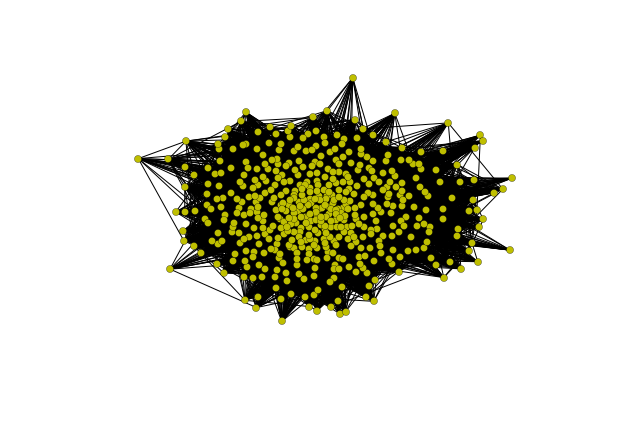

In [60]:
nx.draw(K, node_size = 50, node_color='y')
plt.savefig('/home/jcapitz/Documents/THESIS/summary/PIP_genes_ntwk')
plt.show()

### Most Connected Gene

### Lowest PageRank Gene

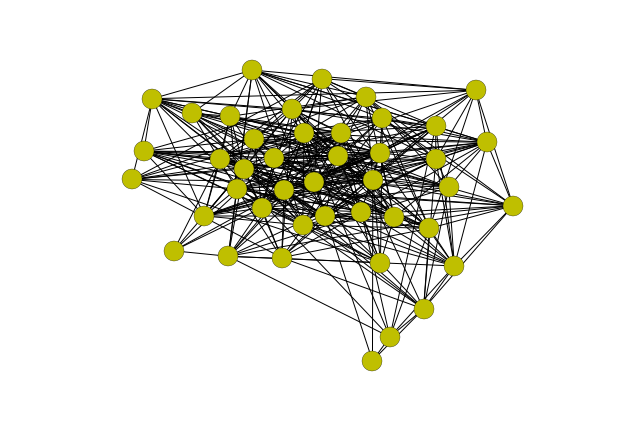

In [61]:
J = G.subgraph(G.neighbors('GI_31341400-S'))

#plt.figure(figsize=(25,25))
nx.draw(J, node_size = 400, node_color='y')

### Power Law Analysis

In [62]:
def degree_histogram(graph,filename):
    deg = graph.degree().values()
    freq = [deg.count(x) for x in deg]
    plt.hist(deg, bins = 20)
    plt.title('Degree Histogram')
    plt.xlabel('degree')
    plt.ylabel('frequency')
    figure_file = '/home/jcapitz/Documents/THESIS/summary/'+filename
    plt.savefig(figure_file)
    plt.show()
    
def degree_distribution(graph,filename):
    deg = graph.degree().values()
    freq = [deg.count(x) for x in deg]
    plt.scatter(np.log2(deg),np.log2(freq))
    plt.title('Degree Distribution')
    plt.xlabel('log2(degree)')
    plt.ylabel('log2(frequency)')
    figure_file = '/home/jcapitz/Documents/THESIS/summary/'+filename
    plt.savefig(figure_file)
    plt.show()

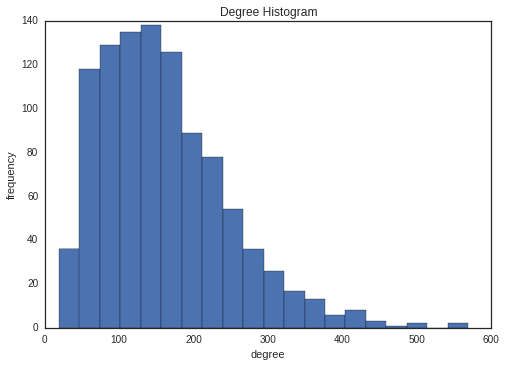

In [63]:
degree_histogram(G,'degree_histo')

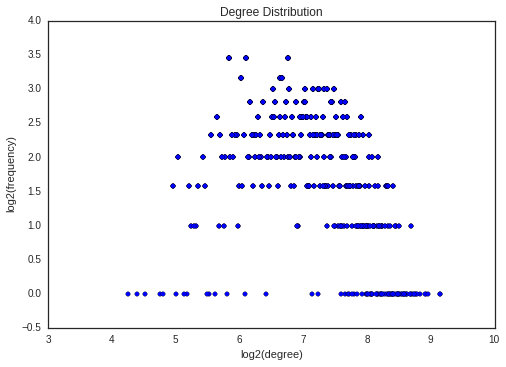

In [64]:
degree_distribution(G,'degree_distro')

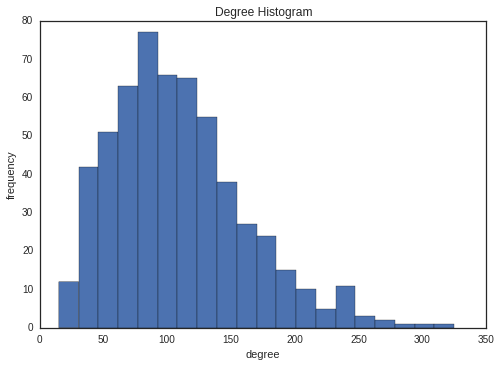

In [65]:
degree_histogram(H,'degree_histo_sub')

###### Tail probabilities:
$$\bar{F}\left(d\right) = 1-F\left(d\right)\sim d^{-\left(\alpha - 1\right)}$$
###### Estimate $\alpha$

###### The MLE of $\alpha$ is:
$$\hat{\alpha}_k = 1 + \hat{\gamma}_k^{-1}$$

###### With:
$$\hat{\gamma}_k = \frac{1}{k} \sum_{i=0}^{k-1} \log{\frac{d_\left(N_v-i\right)}{d_\left(N_v-k\right)}}$$

In [66]:
def alphaK(deg,k):
    deg.sort()
    degorder = np.asarray(deg)
    gammaK = sum(np.log(degorder[-k:]/float(degorder[len(deg) - k])))/k
    alpha = 1 + gammaK**-1
    return alpha

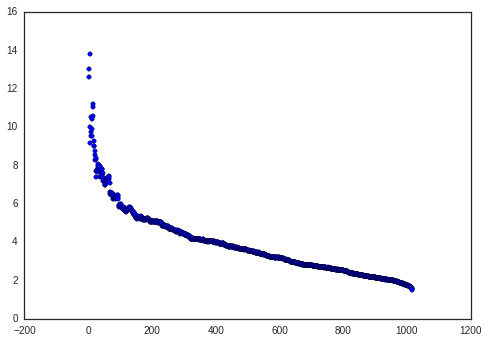

In [67]:
deg = G.degree().values()

kvec = range(1,1018)
alpha = [alphaK(deg,i) for i in kvec]

plt.scatter(kvec[2:],alpha[2:])
plt.show()

In [68]:
alphaK(deg,1017)

1.5038431217909083

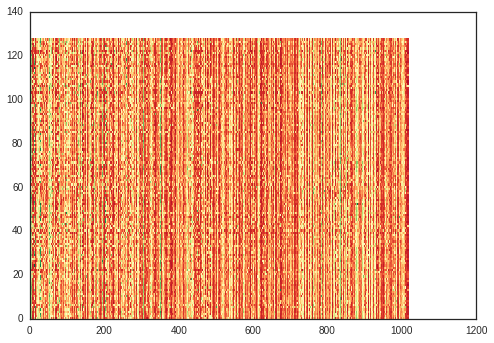

In [69]:
import matplotlib.cm as cm
plt.pcolor(X_sel, cmap=cm.RdYlGn)
plt.show()

In [70]:
def logloss_gradient(w,X,y):
    """
    Calculates gradient of the logistic loss;
    arguments:
        w: numpy array of feature coefficients with shape (p,)
        X: numpy array with shape (n,p)
        y: numpy array of responses with shape (n,)
    returns:
        g: numpy array containing gradient values with shape (p,)
    """
    n = X.shape[0]
    z = np.dot(X,w)
    p = 1/(1 + np.exp(-z))
    g = np.dot((p - y),X)/n
    return g

In [71]:
w = 2*results['Coefficient']
w = np.random.uniform(-10,10,(1017,))

In [72]:
logloss_gradient(w,X_sel,Y).shape

(1017,)

In [73]:
def loss(X,y,w):
    """
    comment
    """
    n = X.shape[0]
    exp = 1 + np.exp(-np.dot(X,w))
    l = ( (1 - y) * np.dot(X,w) + np.log(exp) ) / n
    return np.sum(l)

In [74]:
w.shape

(1017,)

In [75]:
loss(X_sel,Y,w)

447.213502198669

In [76]:
gcost_file = '~/Documents/THESIS/breast_cancer_analysis/seqcost2015_4.csv'

gcost = pd.read_csv(gcost_file)

In [77]:
gcost.head()

,Date,Cost per Mb,Cost per Genome
0,Sep-01,"$5,292.39","$95,263,072"
1,Mar-02,"$3,898.64","$70,175,437"
2,Sep-02,"$3,413.80","$61,448,422"
3,Mar-03,"$2,986.20","$53,751,684"
4,Oct-03,"$2,230.98","$40,157,554"


In [78]:
gcost.columns = ['Date','Cost per Mb','Cost per Genome']

In [79]:
string='abc'
string = string[1:]
string

'bc'

In [80]:
gcost['Cost per Mb']=gcost['Cost per Mb'].apply(lambda x: x.replace(',',''))
gcost['Cost per Mb']=gcost['Cost per Mb'].apply(lambda x: x.replace('$','')).astype(float)

In [81]:
gcost['Cost per Genome']=gcost['Cost per Genome'].apply(lambda x: x.replace(',',''))
gcost['Cost per Genome']=gcost['Cost per Genome'].apply(lambda x: x.replace('$','')).astype(float)

In [82]:
gcost.head()

,Date,Cost per Mb,Cost per Genome
0,Sep-01,5292.39,95263072
1,Mar-02,3898.64,70175437
2,Sep-02,3413.80,61448422
3,Mar-03,2986.20,53751684
4,Oct-03,2230.98,40157554


In [83]:
gcost['Date'] = pd.to_datetime(gcost['Date'],format='%b-%y')

In [88]:
gcost

,Date,Cost per Mb,Cost per Genome
0,2001-09-01,5292.390,95263072
1,2002-03-01,3898.640,70175437
2,2002-09-01,3413.800,61448422
3,2003-03-01,2986.200,53751684
4,2003-10-01,2230.980,40157554
5,2004-01-01,1598.910,28780376
6,2004-04-01,1135.700,20442576
7,2004-07-01,1107.460,19934346
8,2004-10-01,1028.850,18519312
9,2005-01-01,974.160,17534970


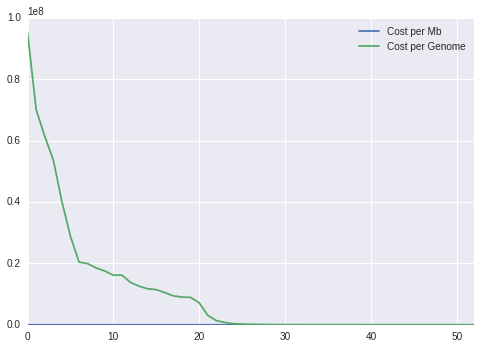

In [128]:
gcost.plot()

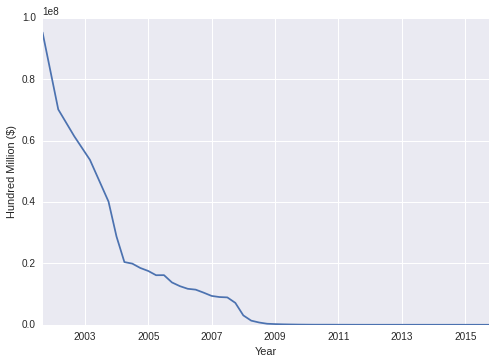

In [129]:
sns.set(style="darkgrid")
plt.plot(gcost['Date'],gcost['Cost per Genome'])
plt.ylabel('Hundred Million ($)')
plt.xlabel('Year')

plt.savefig('/home/jcapitz/Documents/THESIS/summary/genome_cost')
plt.show()

In [130]:
(gcost.index[52],gcost['Cost per Genome'][52])

(52, 1245.0)

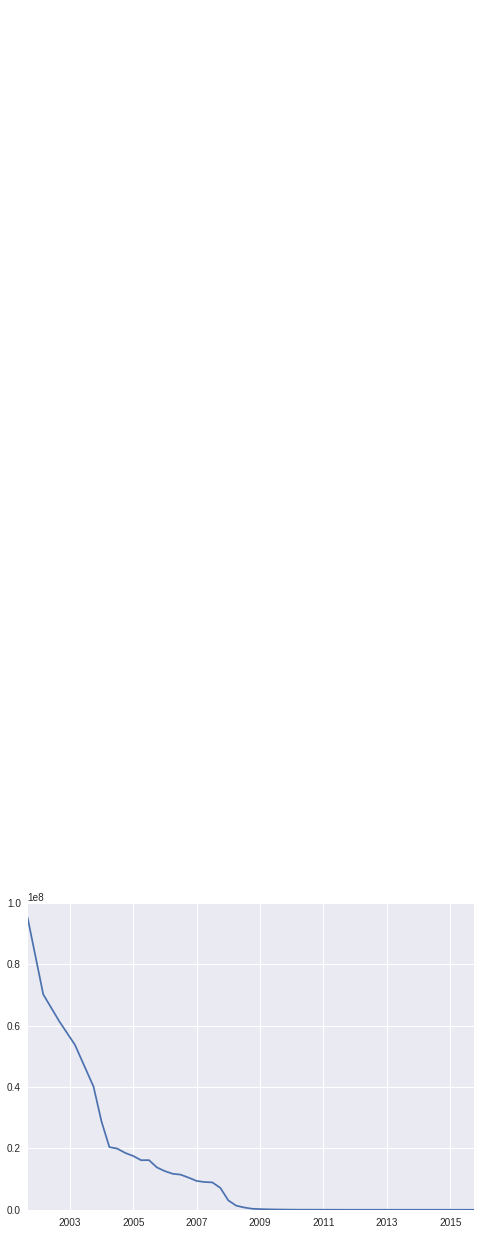

In [126]:
#plt.plot(gcost['Date'],gcost['Cost per Genome'])
#plt.ylabel('Hundred Million ($)')
#plt.xlabel('Year')

fig, ax = plt.subplots()
ax.plot(gcost['Date'],gcost['Cost per Genome'])

ax.annotate('1245', (gcost.index[52],gcost['Cost per Genome'][52]))
plt.show()